# HW1

## Part-1    Linear Filter

### a. Image Denoising

Write a Gaussian filter to denoise the given noisy image. The size of the filter is up to you. Show the result.

### I.

This imports all the dependent packages and loads the image.

**Do not modify this part.**

size of loaded image is  (508, 508)


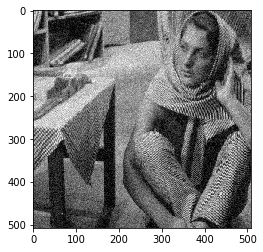

In [12]:
# do not change this part
# import the packages needed for this task, you will need to install
# them if you do not have them
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# load the image
I = np.asarray(Image.open('noisy_image.jpg').convert("L"), dtype=float)

# print the size of loaded image
print("size of loaded image is ", I.shape)

# show the loaded image
plt.imshow(I, cmap="gray")

### II.

Here is a demo using mean filter to denoise the image, the noise is removed but the image is blurred.

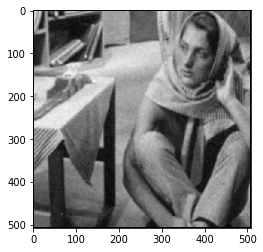

In [2]:
# demo
# using mean filter to denoise the image

my_filter = np.ones([5,5])
m, n = my_filter.shape
my_filter = my_filter / m / n
new_img = np.zeros_like(I)

for i in range(I.shape[0] - m//2 * 2):
    for j in range(I.shape[1] - n//2 * 2):
        new_img[i+m//2,j+n//2] = sum(sum(np.multiply(I[i:i+m, j:j+n], my_filter)))
        
plt.imshow(new_img, cmap="gray")

### III.

<span style="color:red">**Todo:**</span>

You need to implement a Gaussian filter (choose a reasonable size), and use this filter to denoise the image. 

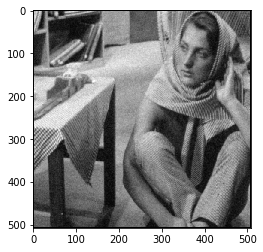

In [3]:
# todo:
# implement Gaussian filter to denoise the image
def get_gaussian_image(size, sigma, image):
    #get the gaussian filter 
    m = size
    n = size
    x, y = np.mgrid[-(size-1)/2:(size+1)/2, -(size-1)/2:(size+1)/2]
    g_filter = np.exp(-(x*x+y*y)/(2*sigma**2))
    g_filter = g_filter / np.sum(g_filter)
    #get the image after applying gaussian filter
    g_img = np.zeros_like(image)
    for i in range(image.shape[0] - m//2 * 2):
        for j in range(image.shape[1] - n//2 * 2):
            g_img[i+m//2,j+n//2] = sum(sum(np.multiply(image[i:i+m, j:j+n], g_filter)))
    return g_img
       
plt.imshow(get_gaussian_image(5, 0.8, I), cmap="gray")

### b. Edge Detection

Write a Laplacian filter for edge detection. The size of the filter is up to you. Show the result.

### I.

This part imports all the dependent packages and loads the image.

**Do not modify this part.**

size of loaded image is  (210, 240)


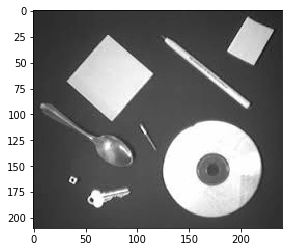

In [4]:
# do not change this part
# import the packages needed for this task, you will need to install
# them if you do not have them
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# load the image
I = np.asarray(Image.open('edge_detection_image.jpg').convert("L"), dtype=float)

# print the size of loaded image
print("size of loaded image is ", I.shape)

# show the loaded image
plt.imshow(I, cmap="gray")

### II.

Here is a demo using the Sobel operator (https://en.wikipedia.org/wiki/Sobel_operator) to detect edges. 

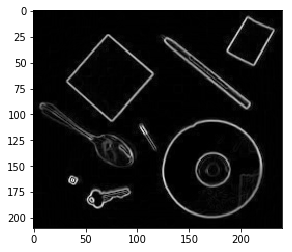

In [5]:
# demo
# sobel edge detector
# https://en.wikipedia.org/wiki/Sobel_operator

Gy = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
Gx = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
m, n = Gx.shape
edge_x_img = np.zeros_like(I)
edge_y_img = np.zeros_like(I)
edge_img = np.zeros_like(I)

for i in range(I.shape[0] - m//2 * 2):
    for j in range(I.shape[1] - n//2 *2):
        edge_x_img[i+m//2,j+n//2] = sum(sum(np.multiply(I[i:i+m, j:j+n], Gx)))
        edge_y_img[i+m//2,j+n//2] = sum(sum(np.multiply(I[i:i+m, j:j+n], Gy)))
        edge_img[i+m//2, j+n//2] = np.sqrt(edge_x_img[i+m//2,j+n//2] ** 2 + edge_y_img[i+m//2,j+n//2] ** 2)

plt.imshow(edge_img, cmap="gray")

### III.

<span style="color:red">**Todo:**</span>

You need to perform edge detection using the Laplacian filter.

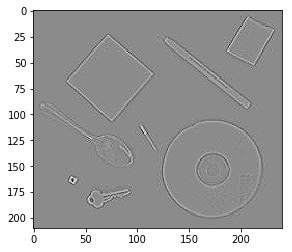

In [6]:
# todo:
# implement edge detection by laplacian operator
lp_filter = np.array([[0,-1,0],[-1,4,-1],[0,-1,0]])
m, n = lp_filter.shape
lp_edge_img = np.zeros_like(I)

for i in range(I.shape[0] - m//2 * 2):
    for j in range(I.shape[1] - n//2 * 2):
        lp_edge_img[i+m//2,j+n//2] = sum(sum(np.multiply(I[i:i+m, j:j+n], lp_filter)))
        
plt.imshow(lp_edge_img, cmap="gray")

### IV.

<span style="color:red">**Todo:**</span>

**Answer the following questions**

How does the Laplacian filter capture the edges? How is that different from Sobel filters? (double click the block below to edit and answer)

Your answer : The edges are located by detecting the zero-crossings of second derivative (Laplacian filter). It is different from Sobel filters, which capture edges by approximating the gradient magnitude. 



### c. SSD (Sum of Squared Differences)

The three channels of the given image have been shifted, find the shift offset by SSD and recover the original image. You may align any two channels to the third one. As long as the image is well recovered, you will receive full credit. You may assume the shift offset in both directions between the channels is no larger than $40$ pixels.

### I.

This part imports all the dependent packages and loads the image.

**Do not modify this part.**

size of loaded image is  (180, 320, 3)


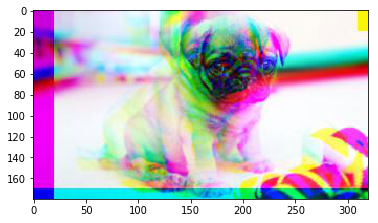

In [7]:
# do not change this part
# import the packages needed for this task, you will need to install
# them if you do not have them

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# load the image
I = np.asarray(Image.open('pug_image.jpg'))
I.setflags(write=1)

# print the size of loaded image
print("size of loaded image is ", I.shape)

# show the loaded image
plt.imshow(I)

### II.

<span style="color:red">**Todo:**</span>

You need to align the image **by SSD**.

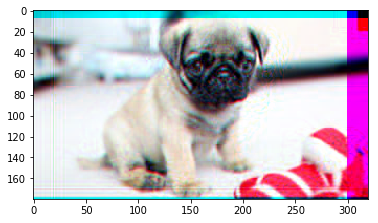

In [8]:
# todo:
# recover the original image

#get three channels
channel1 = I[:, :, 0]
channel2 = I[:, :, 1]
channel3 = I[:, :, 2]

#we cut out a part from channel3 picture and choose it as a base for matching 
example = channel3[30:160, 50:250]

#Use SSD to match the example in channel1 and channel2, so that we can know how they are 
#shifted compared to channel3. Then we shift them back.
def shift_the_channel(channel):
    x1 = 0
    y1 = 0
    min_SSD = 130*200*255**2
    for i in range(50):
        for j in range(120):
            window = channel[i:i+130, j:j+200]
            SSD = np.sum((window-example)*(window-example))
            if SSD < min_SSD:
                min_SSD = SSD
                y1 = i
                x1 = j
    shift_x = x1-50
    shift_y = y1-30
    channel_new_y = np.zeros([180,320])
    channel_new_x = np.zeros([180,320])
    if shift_y <= 0:
        for i in range(180+shift_y):
            channel_new_y[i-shift_y] = channel[i]
    if shift_y > 0:
        for i in range(180-shift_y):
            channel_new_y[i] = channel[i+shift_y]
    if shift_x <= 0:
        for i in range(320+shift_x):
            channel_new_x[:, i-shift_x] = channel_new_y[:, i]
    if shift_x > 0:
        for i in range(320-shift_x):
            channel_new_x[:, i] = channel_new_y[:, i+shift_x]
    return channel_new_x

#get the shifted channel and combine them togather
channel_new1 = shift_the_channel(channel1)
channel_new2 = shift_the_channel(channel2)

new_I = I
new_I[:, :, 0] = channel_new1
new_I[:, :, 1] = channel_new2
plt.imshow(new_I)

## Part-2    Hybrid Images

### I.

This part imports all the dependent packages and loads the image.

**Do not modify this part.**

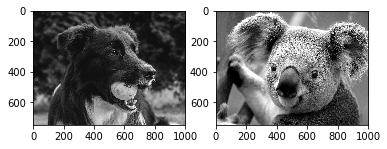

In [9]:
# do not change this part
# import the packages needed for this task, you will need to install
# them if you do not have them

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# load the image
dog = np.asarray(Image.open('dog.jpg').convert("L"), dtype=float) / 255
dog.setflags(write=1)

# load the image
koala = np.asarray(Image.open('koala.jpg').convert("L"), dtype=float) / 255
koala.setflags(write=1)

f, axarr = plt.subplots(1,2)
axarr[0].imshow(dog, cmap='gray')
axarr[1].imshow(koala, cmap='gray')

### II.

<span style="color:red">**Todo:**</span>

For the koala image, keep the high frequencies and remove the low frequencies. For the dog image, keep the low frequencies and remove the high frequencies. Show the results.

**HINT:** you may use functions in numpy package to perform 2-D Fourier transform and inverse transform

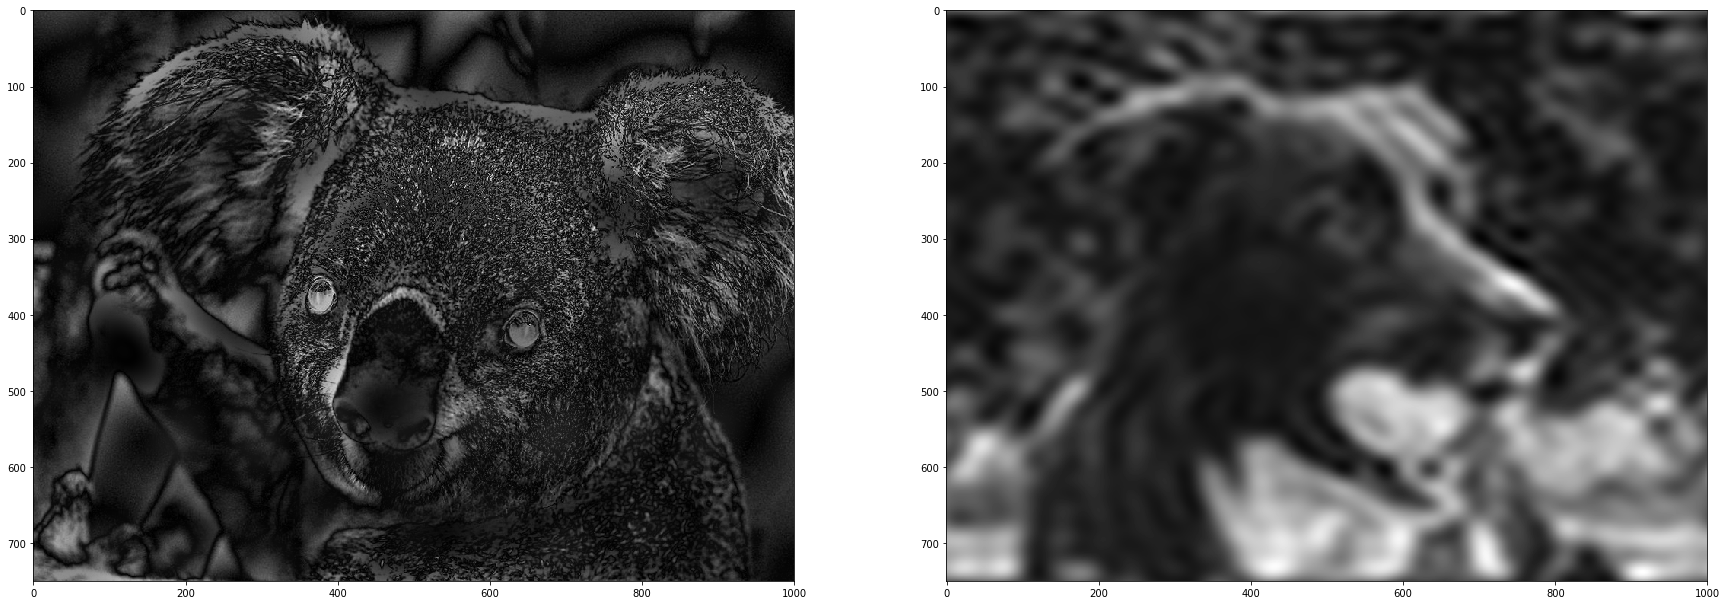

In [10]:
# todo:
# process the image as required
f_k = np.fft.fft2(koala)
fshift_k = np.fft.fftshift(f_k)
#magnitude_spectrum_k = 20*np.log(np.abs(fshift_k))

rows_k, cols_k = koala.shape
crow_k, ccol_k = int(rows_k/2), int(cols_k/2)
fshift_k[crow_k-5:crow_k+5, ccol_k-5:ccol_k+5] = 0
f_ishift_k = np.fft.ifftshift(fshift_k)
hf_koala = np.fft.ifft2(f_ishift_k)
hf_koala = np.abs(hf_koala)

f_d = np.fft.fft2(dog)
fshift_d = np.fft.fftshift(f_d)
#magnitude_spectrum_d = 20*np.log(np.abs(fshift_d))

rows_d, cols_d = dog.shape
crow_d, ccol_d = int(rows_d/2), int(cols_d/2)

# create a mask 
mask = np.zeros((rows_d,cols_d),np.uint8)
mask[crow_d-20:crow_d+20, ccol_d-20:ccol_d+20] = 1

# apply mask and inverse DFT
fshift_d_new = fshift_d*mask
f_ishift_d = np.fft.ifftshift(fshift_d_new)
lf_dog = np.fft.ifft2(f_ishift_d)
lf_dog = np.abs(lf_dog)

f, axarr = plt.subplots(1,2, figsize = (30, 30))
axarr[0].imshow(hf_koala, cmap='gray')
axarr[1].imshow(lf_dog, cmap='gray')

### III.

<span style="color:red">**Todo:**</span>

Now, combine the two into a hybrid image. Show the result.

Keep sampling the image. Show the result. 

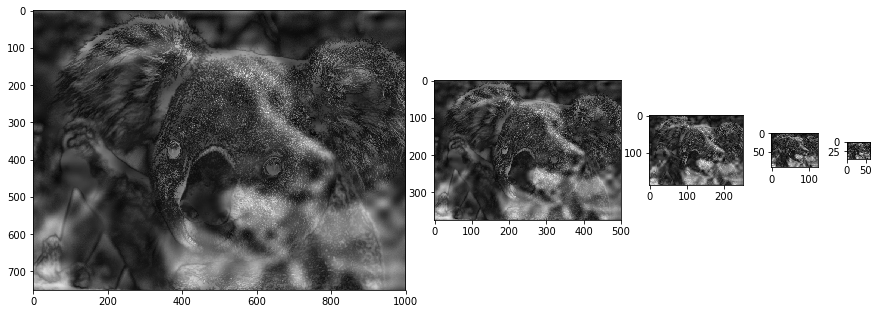

In [11]:
# todo:
# get the hybrid image and sampling results
import math

hybrid = hf_koala + lf_dog

def downsampling(sample):
    rows, cols = sample.shape
    sampling_rows = math.floor(rows/2)
    sampling_cols = math.floor(cols/2)
    sampling = np.zeros([sampling_rows, sampling_cols])
    for i in range(sampling_rows):
        for j in range(sampling_cols):
            sampling[i, j] = sample[2*i+1, 2*j+1]
    return sampling

sampling1 = downsampling(hybrid)
sampling2 = downsampling(sampling1)
sampling3 = downsampling(sampling2)
sampling4 = downsampling(sampling3)

f, axarr = plt.subplots(1,5, figsize = (15, 15), gridspec_kw = {'width_ratios':[16, 8, 4, 2, 1]})
axarr[0].imshow(hybrid, cmap='gray')
axarr[1].imshow(sampling1, cmap='gray')
axarr[2].imshow(sampling2, cmap='gray')
axarr[3].imshow(sampling3, cmap='gray')
axarr[4].imshow(sampling4, cmap='gray')

### III.

<span style="color:red">**Todo:**</span>

**Answer the following questions**

Explain why the image changes as sampling continues. Suppose you are given only the hybrid image, how can you recover the two images that it is formed with?

Your answer : When we sample the hybrid image, the high frequencies are transformed to low frequencies, therefore, the high-frequency koala image will be more and more blurred, and the dog image will be more and more obvious.
We need to apply a high-pass filter to the hybrid image to see only high frequency image and a low-pass filter to see only low frequency image, in this way, we can separate the hybrid image into two images. Then for the low frequency image, we can deblur it with sharpening. For the high frequency image, we can perform a reverse operation of image gradient.